In [1]:
import numpy as np
import scanpy as sc
from sklearn import decomposition, manifold
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [2]:
import warnings
from numba.core.errors import NumbaDeprecationWarning
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
ad = sc.read_h5ad('endocrinogenesis.h5ad')
X_pca  = ad.obsm['X_pca']

In [4]:
ad.uns['iroot']= 2208

In [5]:
sc.pp.neighbors(ad, 10)
sc.tl.diffmap(ad, 10)
sc.tl.dpt(ad, n_dcs=10,  copy=False)

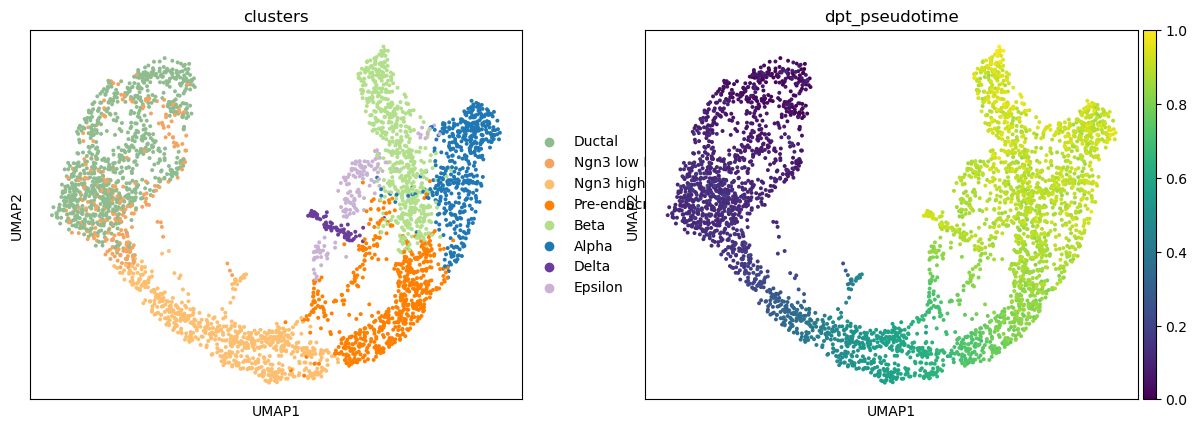

In [6]:
sc.tl.umap(ad)
sc.pl.umap(ad, color=['clusters','dpt_pseudotime'])

In [7]:
ad.obs['dpt_pseudotime'].to_csv('pan.dpt_pseudotime.csv')

In [8]:
sc.external.tl.palantir(ad)

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


Determing nearest neighbor graph...


In [9]:
pal_res = sc.external.tl.palantir_results(ad,early_cell=ad.obs_names[2208])

Sampling and flocking waypoints...
Time for determining waypoints: 0.0054906805356343584 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.1953002095222473 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [10]:
X_umap = ad.obsm['X_umap']

In [11]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline

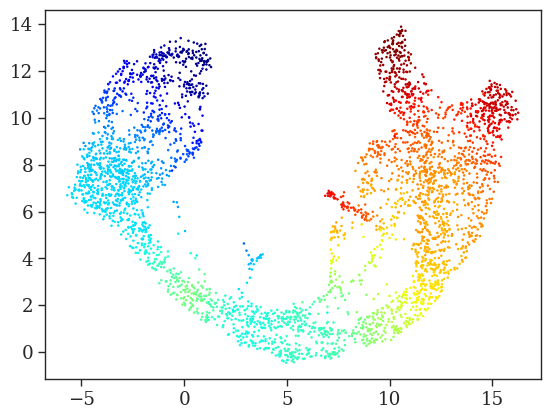

In [12]:
plt.scatter(X_umap[:,0],X_umap[:,1], s =1,c=pal_res.pseudotime.values,cmap="jet") 
plt.show()

In [13]:
pal_res.pseudotime.to_csv('pan.palantir_pseudotime.csv')